# Coursera IBM Certification
###  Capstone Project

In [2]:
import numpy as np
import pandas as pd

### Read data 

In [3]:
df1 = pd.read_csv('Consumer_Complaints.csv')
df1.head()

C:\Users\chencp\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,7/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,7/30/2013,Closed with explanation,Yes,No,468882
1,7/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,7/31/2013,Closed with explanation,Yes,No,468889
2,7/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,7/31/2013,Closed,Yes,No,468879
3,7/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,7/30/2013,Closed with explanation,Yes,No,468949
4,7/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,6106,NaN,NaN,Web,7/30/2013,Closed with explanation,Yes,No,475823


### Understand data 

In [3]:
print(df1.shape)   # (221420, 18) 
df1['Date received'] = pd.to_datetime(df1['Date received'])    # Convert to Date
print('Data from: ', df1['Date received'].min(), 'to:', df1['Date received'].max())   # (2011-12-01 - 2016-06-28 )
print(df1['Product'].value_counts())# Mortgage  69415; Debt collection  45136; ......

print(df1['Tags'].value_counts())  # Older American; Servicemember ; or both
print(df1['Timely response?'].value_counts())  #  Yes    216056  No       5364

(221420, 18)
Data from:  2011-12-01 00:00:00 to: 2016-06-28 00:00:00
Mortgage                   69415
Debt collection            45136
Credit reporting           38752
Credit card                24959
Bank account or service    23848
Consumer Loan               8616
Student loan                6163
Payday loan                 1746
Money transfers             1671
Prepaid card                 907
Other financial service      207
Name: Product, dtype: int64
Older American                   18375
Servicemember                    10896
Older American, Servicemember     2540
Name: Tags, dtype: int64
Yes    216056
No       5364
Name: Timely response?, dtype: int64


In [4]:
print(df1['Product'].value_counts())

Mortgage                   69415
Debt collection            45136
Credit reporting           38752
Credit card                24959
Bank account or service    23848
Consumer Loan               8616
Student loan                6163
Payday loan                 1746
Money transfers             1671
Prepaid card                 907
Other financial service      207
Name: Product, dtype: int64


### Data Cleaning

In [4]:
from pandas import DataFrame
import nltk
import string
import nltk.metrics
from nltk.stem import WordNetLemmatizer
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize



#### Only use Narrative and Product 

In [5]:
df1.rename(columns = {'Consumer complaint narrative':'Narrative'}, inplace = True)
df1 = df1[['Narrative','Product']]
df1 = df1[pd.notnull(df1['Narrative'])]
df1.head()

,Narrative,Product
57729,Received Capital One charge card offer XXXX. A...,Credit card
57787,I do n't know how they got my cell number. I t...,Debt collection
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card
57848,"After looking at my credit report, I saw a col...",Credit reporting
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

product_count = df1['Product'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(product_count.index, product_count.values, alpha=0.8)
plt.ylabel('Number of Appearance', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

<Figure size 1200x400 with 1 Axes>

#### Remove Stop Words; Tokenize and Lemmatize words; remove "XX"


In [7]:
stopWords = set(nltk.corpus.stopwords.words('english'))
allStops = stopWords | set(string.punctuation) | set(('•','-'))

tokenizer = nltk.TweetTokenizer()    
lemmatizer = WordNetLemmatizer()
df1['Narrative_simple'] = ""

for index, row in df1.iterrows():
#    print(type(row['Narrative']), row['Narrative'])
    tokens = tokenizer.tokenize(row['Narrative'])
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [t.lower() for t in tokens if t.lower() not in allStops  and len(t) >= 2]
    words = ""
    for w in tokens:
        if w.find('xx')<0:
            words += " " + w
    row['Narrative_simple'] = words
df1.head(20)

,Narrative,Product,Narrative_simple
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer applie...
57787,I do n't know how they got my cell number. I t...,Debt collection,n't know got cell number told would deal only...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bank rbs citizens...
57848,"After looking at my credit report, I saw a col...",Credit reporting,looking credit report saw collection account ...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,received call ext stating owed 400.00 wanted ...
57864,Was not contacted 4 years later about some pri...,Student loan,contacted year later private loan supposedly ...
57865,Collection Consultants is reporting a collecti...,Debt collection,collection consultants reporting collection a...
57868,I had my purse stolen in 2007. They never foun...,Credit reporting,purse stolen 2007 never found person responsi...
57871,I attempted to apply for a Discover Card Onlin...,Credit card,attempted apply discover card online system h...
57872,Continued attempts by XXXX XXXX XXXX to collec...,Debt collection,continued attempt collect debt name debt wa c...


In [8]:
## Use TFIDF to find tf-idf vector for each record:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,3), stop_words='english')

features = tfidf.fit_transform(df1['Narrative_simple'])
labels = df1['Product']
features.shape   #(28629, 91639)


(28629, 91639)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np

df_product = df1['Product'].drop_duplicates().reset_index()
df_product.reset_index(drop=True)

,index,Product
0,57729,Credit card
1,57787,Debt collection
2,57848,Credit reporting
3,57864,Student loan
4,57884,Mortgage
5,57945,Payday loan
6,57952,Bank account or service
7,58112,Consumer Loan
8,58538,Money transfers
9,58607,Prepaid card


In [10]:
df_product.head()

,index,Product
0,57729,Credit card
1,57787,Debt collection
2,57848,Credit reporting
3,57864,Student loan
4,57884,Mortgage


In [11]:


N = 5
for Product in df_product['Product']:
  features_chi2 = chi2(features, labels == Product)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]

  print("# '{}':".format(Product))
  print("  . Most frequent unigrams:\n    . {}".format('\n    . '.join(unigrams[-N:])))
  print("  . Most frequent bigrams:\n    . {}".format('\n    . '.join(bigrams[-N:])))
  print("  . Most frequent trigrams:\n    . {}".format('\n    . '.join(trigrams[-N:])))

# 'Credit card':
  . Most frequent unigrams:
    . express
    . amex
    . macy
    . capital
    . card
  . Most frequent bigrams:
    . card company
    . balance transfer
    . card wa
    . american express
    . credit card
  . Most frequent trigrams:
    . chase credit card
    . capital credit card
    . credit card wa
    . credit card account
    . credit card company
# 'Debt collection':
  . Most frequent unigrams:
    . calling
    . recovery
    . collect
    . collection
    . debt
  . Most frequent bigrams:
    . debt collector
    . debt collection
    . debt wa
    . collection agency
    . collect debt
  . Most frequent trigrams:
    . debt wa paid
    . attempt collect debt
    . attempting collect debt
    . debt collection agency
    . trying collect debt
# 'Credit reporting':
  . Most frequent unigrams:
    . reporting
    . transunion
    . report
    . experian
    . equifax
  . Most frequent bigrams:
    . credit reporting
    . equifax ha
    . equifax credit


#### Naive Bayes Classified:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df1['Narrative_simple'], df1['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["I received a phone call from this credit card company. I tried to dispute the charges. But they did not answer my request"])))


['Debt collection']


In [14]:
print(clf.predict(count_vect.transform(["I tried to buy a car. The price is not the same as the quote."])))


['Mortgage']


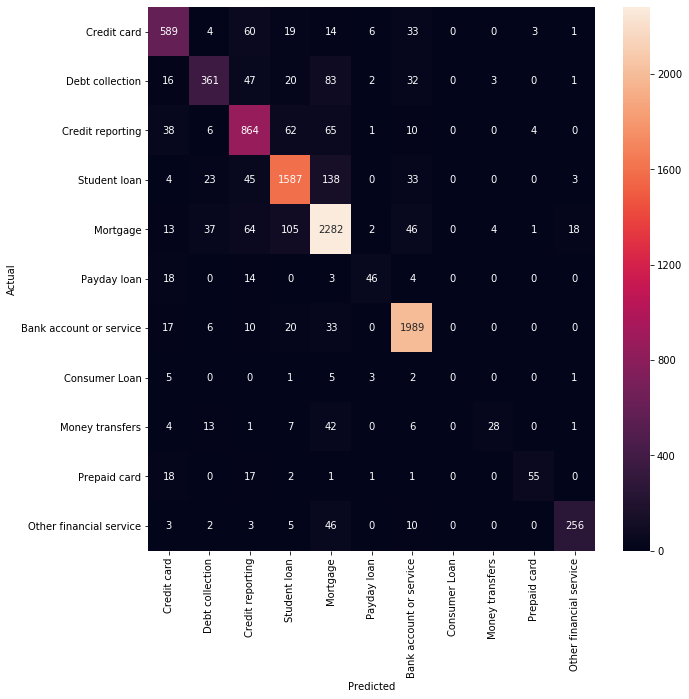

In [16]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df1.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=df_product['Product'], yticklabels=df_product['Product'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
from IPython.display import display

for idx1, row1 in df_product.iterrows():  # Predict
  for idx2, row2 in df_product.iterrows():  # Actural
    if row1['Product'] != row2['Product'] and conf_mat[idx1, idx2] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(row2['Product'], row1['Product'], conf_mat[idx1, idx2]))
      display(df1.loc[indices_test[(y_test == row2['Product']) & (y_pred == row1['Product'])]][['Product', 'Narrative']])
      print('')
      


'Credit reporting' predicted as 'Credit card' : 60 examples.


,Product,Narrative
70030,Credit reporting,Late payment record for sears is false. \n
221118,Credit reporting,I had my credit rating go way up several years...
99138,Credit reporting,XXXX Bank XXXX XXXX XXXX offered me a XXXX cre...
203265,Credit reporting,There are XXXX separate accounts from the same...
93619,Credit reporting,"Hello, I am trying to repair my credit. I call..."
80059,Credit reporting,Last ReportedXX/XX/XXXX XXXX XX/XX/XXXXCollect...
212147,Credit reporting,XXXX XXXX XXXX XXXX screwed me up after I clos...
102475,Credit reporting,Yes it 's been awhile I been using my credit c...
104738,Credit reporting,I have noticed there are XXXX new accounts rep...
93482,Credit reporting,I had a XXXX card for many years I paid on tim...



'Student loan' predicted as 'Credit card' : 19 examples.


,Product,Narrative
101845,Student loan,Discover loans sent me a letter regarding a ru...
64652,Student loan,I have a Navient student loan in repayment and...
67279,Student loan,I have a mortgage still being reported to my C...



'Mortgage' predicted as 'Credit card' : 14 examples.


,Product,Narrative
204230,Mortgage,i was approved for a line of credit with navey...
209558,Mortgage,"I 've been trying for at least a month, to upd..."
66885,Mortgage,i found a 30 day late on my credit report on a...
72247,Mortgage,UMB Bank sent us an offer by mail of a {$75.00...
214175,Mortgage,My mortgage was bought out by M & T Bank XXXX ...
71813,Mortgage,Nationwide is raising my interest rate above t...
86261,Mortgage,Penny Mac consistently misapplies my payments....
80313,Mortgage,I submitted a complaint number XXXX account nu...
76633,Mortgage,"I am a widow, unemployed and XXXX. My husband ..."
90528,Mortgage,"I am a Veteran, and am tired of getting these ..."



'Bank account or service' predicted as 'Credit card' : 33 examples.


,Product,Narrative
85237,Bank account or service,Do to rushcard my bills are being late and im ...
211363,Bank account or service,This is the XXXX complaint that I have filed a...
87653,Bank account or service,Opened an account with substantial funding. XX...
66801,Bank account or service,My wife and I had a XXXX XXXX card which we ha...
87605,Bank account or service,This email relates to PayPal Credit. I have he...
202467,Bank account or service,Bank of America. Not a good option for XXXX XX...
199156,Bank account or service,I opened an account at Citizens Bank ( XXXX ) ...
216832,Bank account or service,When I made a payment on my Home Depot account...
207669,Bank account or service,I opened an account with Google wallet which i...
206756,Bank account or service,I am fortunate enough to have enough money tha...



'Credit card' predicted as 'Debt collection' : 16 examples.


,Product,Narrative
102679,Credit card,I recently pulled my XXXX and XXXX ctedit repo...
220378,Credit card,GECRB/AMAZON PLCC has been reporting an accoun...
67389,Credit card,At the time of my divorce the judge ordered my...
100075,Credit card,I am trying to settle an old charged off accou...
211920,Credit card,There was no validation sent. Was served to co...
95486,Credit card,I settled a debt with Bank of America/XXXX XXX...
78357,Credit card,In 2013 I defaulted on a credit card debt. Thi...
92750,Credit card,I have disputed this Target account multiple t...
89258,Credit card,"XXXX XXXX XXXX or Consumer representative, I p..."
216560,Credit card,"Opened an account with company, set up automat..."



'Credit reporting' predicted as 'Debt collection' : 47 examples.


,Product,Narrative
84626,Credit reporting,"XX/XX/XXXX, I had a XXXX student credit card f..."
71212,Credit reporting,Shows on the credit report that an account wit...
75960,Credit reporting,"1-I was taken to the XXXX for a XXXX problem,2..."
200750,Credit reporting,A {$600.00} medical bill for treatment of my w...
65997,Credit reporting,Transunion is reporting a collection item by X...
207102,Credit reporting,XXXX XXXX has a collection against ( {$580.00}...
75109,Credit reporting,I am seeking assistance with a matter involvin...
209759,Credit reporting,Over XXXX towns and goverment on my documents ...
66419,Credit reporting,I have disputed the validity of a debt in writ...
71986,Credit reporting,The XXXX continues to report that I owe them m...



'Student loan' predicted as 'Debt collection' : 20 examples.


,Product,Narrative
199106,Student loan,They keep calling even after I made payment. U...
208236,Student loan,I had taken a student loan for XXXX XXXX XXXX ...
90699,Student loan,"On XXXX XXXX, 2015, I was informed by the CFPB..."
62522,Student loan,I am being contacted by a debt collector for p...
103344,Student loan,"My loans went to collections, and I was garnis..."
58452,Student loan,"I was behind on my loans, and I called about t..."
220890,Student loan,XX/XX/XXXX I was supposed to be put into a pro...
87212,Student loan,I cosigned for a student loan for my son to be...
103920,Student loan,A fraudulent XXXX loan claiming us to be co-ma...
218455,Student loan,They have been calling me with robo calls 6-8 ...



'Mortgage' predicted as 'Debt collection' : 83 examples.


,Product,Narrative
204731,Mortgage,Nationstar Mortgage was included and paid in f...
62374,Mortgage,Though multiple disputes over Private Mortgate...
80082,Mortgage,"My husband had retired, right after he retired..."
59840,Mortgage,"SCAM ARTIST - Specialized Loan Servicing , LLC..."
97943,Mortgage,XXXX does n't have my information right like X...
111584,Mortgage,This is a formal complaint we want to file on ...
104958,Mortgage,"On XXXX XXXX, 2015, I filed a law suit against..."
94324,Mortgage,The Law is the Law! Statue of Limitations law ...
103247,Mortgage,I have made 4 Principal only payments in the l...
84972,Mortgage,The use of XXXX affidavit by myself and Attorn...



'Bank account or service' predicted as 'Debt collection' : 32 examples.


,Product,Narrative
93956,Bank account or service,"On XXXX XXXX, XXXX I checked my Bank of Americ..."
63390,Bank account or service,We finance a bed bought at XXXX in XXXX 2014. ...
63520,Bank account or service,"Hello, I am trying to resolve an issue with Ba..."
78185,Bank account or service,I wrote check # XXXX XXXX XXXX XXXX XXXX XXXX ...
88888,Bank account or service,I have an old credit card debt that turned int...
94029,Bank account or service,"On XXXX XXXX, 2015, I bought new furniture at ..."
104654,Bank account or service,I received several envelopes from Bank of Amer...
218962,Bank account or service,PNC XXXX XXXX Bank sent me a notice from XXXX ...
87460,Bank account or service,I keep getting junk mail from NetSpend. They w...
63951,Bank account or service,This started when I was a minor XXXX years old...



'Credit card' predicted as 'Credit reporting' : 38 examples.


,Product,Narrative
82559,Credit card,I keep getting charged {$38.00} late fees for ...
77193,Credit card,XXXX sent me an email informing me of a past d...
66164,Credit card,I have credit cards on my credit report as far...
71468,Credit card,Chase Cardmember Services continue to report i...
80021,Credit card,my account is closed and its been years and IR...
85709,Credit card,I have found a XXXX Hard Inquiry on both my XX...
90097,Credit card,I paid and settled a credit card account with ...
77113,Credit card,I am submitting a complaint against Target Cau...
66594,Credit card,Per a credit report pulled in XXXX and dispute...
212500,Credit card,I attempted to change my address three times w...



'Student loan' predicted as 'Credit reporting' : 62 examples.


,Product,Narrative
103759,Student loan,"I recently looked at my credit report ( XXXX, ..."
67280,Student loan,I have a mortgage still being reported to my C...
80598,Student loan,I have requested several times that Campus Par...
200876,Student loan,I have file several complaints with Equifax to...
59935,Student loan,"XX/XX/XXXX, I filed a complaint against the NJ..."



'Mortgage' predicted as 'Credit reporting' : 65 examples.


,Product,Narrative
218517,Mortgage,The account was associated with a foreclosure ...
84212,Mortgage,"Regarding Case number : XXXX, While currently ..."
75821,Mortgage,I have XXXX hard inquiries from Safe Rent ( XX...
89088,Mortgage,This acct is reflecting as in Dispute on my cr...
99573,Mortgage,XXXX/XXXX/XXXX XXXX XXXX XXXX XXXX XXXX # XXXX...
213620,Mortgage,Flagstar Bank is reporting a 30 day late payme...
84325,Mortgage,"I have a loan with servicing company, Loan Car..."
211519,Mortgage,I have called BSI to try to get this handled a...
68538,Mortgage,SLS refuses to give me the proper XX/XX/XXXX X...
221326,Mortgage,We had a mortgage loan reported on credit repo...



'Bank account or service' predicted as 'Credit reporting' : 10 examples.


,Product,Narrative
210363,Bank account or service,I attempted to open a bank account with Wells ...
208182,Bank account or service,Funding suite/ XXXX located at XXXX XXXX XXXX ...
59984,Bank account or service,The problem is with EXPERIANTo know my score I...
76838,Bank account or service,"Good morning, I retrieved my credit report and..."
65113,Bank account or service,"Citizens Bank reported me, rather my business ..."
58552,Bank account or service,Bank of America has submitted a false and inac...
211150,Bank account or service,PayPal closed my account due to me disputing t...
95832,Bank account or service,I am a Bank of America ( bank ) customer. I re...
201163,Bank account or service,"Dear Sir or Madam, While checking my personal ..."
100637,Bank account or service,XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX SS ...



'Debt collection' predicted as 'Student loan' : 23 examples.


,Product,Narrative
87846,Debt collection,XXXX XXXX University returned Student Loan Mon...
102929,Debt collection,Navient continues to call me despite my being ...
213324,Debt collection,I went into default on my private students loa...
85877,Debt collection,Received communication from Enterprise Recover...
205098,Debt collection,I am taking legal action against National Coll...
112093,Debt collection,I was a co signer on a Student loan with my ne...
81662,Debt collection,Sallie Mae made 4 robocalls to both my home ph...
83181,Debt collection,AES 's automated system does not give you the ...
66929,Debt collection,Navient is calling me almost daily regarding m...
63802,Debt collection,My son acquired a student loan but was unable ...



'Credit reporting' predicted as 'Student loan' : 45 examples.


,Product,Narrative
63208,Credit reporting,I have mailed to them letters explaining my po...
203507,Credit reporting,I have a student loan account that is consolid...
214538,Credit reporting,I have had student loans since the age of XXXX...



'Mortgage' predicted as 'Student loan' : 138 examples.


,Product,Narrative



'Bank account or service' predicted as 'Student loan' : 33 examples.


,Product,Narrative
98835,Bank account or service,I was a XXXX customer. I cancelled their servi...



'Credit card' predicted as 'Mortgage' : 13 examples.


,Product,Narrative
95737,Credit card,Sychrony Bank put a 30 day mark on my credit e...
217960,Credit card,Ref : Bank of AmericaI have been working with ...
90938,Credit card,State Farm has failed to send me a bill for th...
74141,Credit card,Bank of America. I called bank of america to s...
203945,Credit card,When I was in the process of refinancing my ho...
204995,Credit card,I have been a US Bank account customer for abo...
80266,Credit card,"Bank of America has wrongfully, maliciously an..."
95381,Credit card,"Six years ago, I opened an HSBC account for my..."
66187,Credit card,every month chase give interest on my account ...
87443,Credit card,I have called multiple times to Aafes credit h...



'Debt collection' predicted as 'Mortgage' : 37 examples.


,Product,Narrative
101721,Debt collection,Bank of America refused to renew a home equity...
111574,Debt collection,I was sued my XXXX University for XXXX loans. ...
70295,Debt collection,We are currently in XXXX Court ( next court da...
210215,Debt collection,Ocwen created a new mortgage with loan number ...
76505,Debt collection,I purchased a property at XXXX XXXX in XXXX Fl...
85220,Debt collection,I received a Notice to Foreclose on court hous...
203498,Debt collection,"In XXXX, I sold my home in a short sale. The X..."
202323,Debt collection,"On XXXX XXXX, 2014, a debt collector threatene..."
72930,Debt collection,Ocwen bought our discharged chapter XXXX bankr...
100984,Debt collection,We paid OCWEN the final balance owed to them o...



'Credit reporting' predicted as 'Mortgage' : 64 examples.


,Product,Narrative
67931,Credit reporting,I had an account with a company called XXXX XX...
220105,Credit reporting,After the death of my husband XX/XX/XXXX and t...
90477,Credit reporting,This is a long story that started in XXXX 2009...
83006,Credit reporting,I filed a modification with XXXX bank and I wa...
211270,Credit reporting,I did a loan modification with XXXX XXXX XXXX....
75174,Credit reporting,My home went into foreclosure in XXXX of 2009 ...
75595,Credit reporting,Several disputes have been sent in regarding m...
207521,Credit reporting,i never applied for the following inquires i d...
85258,Credit reporting,Banks that listed that I have n't banked with ...
67234,Credit reporting,In 2009 we completed a chapter XXXX bankruptcy...



'Student loan' predicted as 'Mortgage' : 105 examples.


,Product,Narrative
67043,Student loan,My wife holds a conditional XXXX. She applied ...
197868,Student loan,This is a letter that I sent to the companies ...
64424,Student loan,I have a geniesis loan I did not recieve a dec...
67532,Student loan,Original amount of loan was {$21000.00}. I hav...
94370,Student loan,"My interest rate went up, when I was supposed ..."
98188,Student loan,I do not receive statements/bills or any other...
202481,Student loan,I have serveral loans through the Vermont Stud...
104104,Student loan,They refuse to let me make a payment over the ...
220459,Student loan,On XXXX/XXXX/2015 I filed a complaint with CFP...
213896,Student loan,I try to submit a payment online to acs ( http...



'Bank account or service' predicted as 'Mortgage' : 46 examples.


,Product,Narrative
218675,Bank account or service,Please see attached for entire narrative. \nI ...
204205,Bank account or service,I receive a letter from TD Bank stating I was ...
89642,Bank account or service,This complaint is about bank/financial service...
211826,Bank account or service,The incidents have taken place between the dat...
67412,Bank account or service,"Simply, I am trying to locate and ascertain th..."
64919,Bank account or service,On XXXX XXXX I received A call from the compan...
65067,Bank account or service,I was interested in buying a home so I went in...
64441,Bank account or service,I found out that a loan I had was with a lende...
206445,Bank account or service,XXXX complaintI wrote a check for {$1900.00} a...
203168,Bank account or service,On or around XXXX/XXXX/2015 I realized I owed ...



'Other financial service' predicted as 'Mortgage' : 18 examples.


,Product,Narrative
102758,Other financial service,hired foreclosure defense group charged me a s...
96758,Other financial service,I had a contractor who fraudulently endorsed a...



'Credit card' predicted as 'Payday loan' : 18 examples.


,Product,Narrative



'Credit reporting' predicted as 'Payday loan' : 14 examples.


,Product,Narrative



'Credit card' predicted as 'Bank account or service' : 17 examples.


,Product,Narrative
204909,Credit card,BANK OF AMERICA IS UNLAWFULLY RE-INSERTING ACC...
212339,Credit card,BBVA Compass is scamming customers. \nWhen a c...
104101,Credit card,I own XXXX XXXX Bank of America XXXX and XXXX ...
60071,Credit card,"My name is XXXX XXXX XXXX, I live at XXXX XXXX..."
62064,Credit card,This company misrepresented their terms and ch...
92325,Credit card,This bank has no issue placing hard inquiries ...
213770,Credit card,I have changed the settings in my Best Buy cre...
92585,Credit card,on XXXX/XXXX/16 I have a XXXX so why did they ...
203579,Credit card,"On XX/XX/XXXX, I applied for BBVA Compass XXXX..."
64866,Credit card,While conducting online banking within TD Bank...



'Credit reporting' predicted as 'Bank account or service' : 10 examples.


,Product,Narrative
76494,Credit reporting,"I received my credit score for free, but agree..."
60435,Credit reporting,I phoned the service and the bank and have not...
96384,Credit reporting,I had an account with JPMorgan Chase that was ...
204471,Credit reporting,This was a case of identity fraud. Someone was...



'Student loan' predicted as 'Bank account or service' : 20 examples.


,Product,Narrative
217804,Student loan,My name is XXXX XXXX. XXXX held XXXX student l...
77127,Student loan,XXXXDear Citizen 's Bank : These are instructi...
83821,Student loan,On XXXX/XXXX/15 I paid ACS education services ...



'Mortgage' predicted as 'Bank account or service' : 33 examples.


,Product,Narrative
216901,Mortgage,Bank of America has inaccurate information lis...
63468,Mortgage,I have a mortgage account with Bank Of America...
68083,Mortgage,This is a complaint about the CFPB process. I ...
65093,Mortgage,Follow up to case number : XXXX wish to reopen...
90186,Mortgage,BANK OF AMERICA THE Alleged Investor /Owner of...
71549,Mortgage,I have been advised by the Office of the Compt...
77742,Mortgage,I paid off my equity loan and ask the bank emp...
82795,Mortgage,This loan has been closed for several years ye...
75527,Mortgage,"I have complained about CHASE bank many times,..."
101261,Mortgage,PNC Bank issued a check to us to the wrong add...



'Debt collection' predicted as 'Money transfers' : 13 examples.


,Product,Narrative
65656,Debt collection,My name is XXXX XXXX XXXX XXXX and I am reachi...
77966,Debt collection,I was contacted by Becker and Klein stating i ...



'Mortgage' predicted as 'Money transfers' : 42 examples.


,Product,Narrative



'Credit card' predicted as 'Prepaid card' : 18 examples.


,Product,Narrative
95272,Credit card,i had to call 4 times this morning to make a p...
207455,Credit card,"I received a Citi Prepaid Services card, and o..."
215695,Credit card,I file a dispute with American Express. On XXX...
65673,Credit card,"On a XXXX XXXX, XXXX XXXX, 2015, I was away XX..."



'Credit reporting' predicted as 'Prepaid card' : 17 examples.


,Product,Narrative



'Mortgage' predicted as 'Other financial service' : 46 examples.


,Product,Narrative



'Bank account or service' predicted as 'Other financial service' : 10 examples.


,Product,Narrative


In [16]:
model.fit(features, labels)

N = 5

for idx1, row1 in df_product.iterrows():
  indices = np.argsort(model.coef_[idx1])

  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  trigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 3][:N]   
  print("# '{}':".format(Product))
  print("  . Most frequent unigrams:\n    . {}".format('\n    . '.join(unigrams[-N:])))
  print("  . Most frequent bigrams:\n    . {}".format('\n    . '.join(bigrams[-N:])))
  print("  . Most frequent trigrams:\n    . {}".format('\n    . '.join(trigrams[-N:])))


# 'Other financial service':
  . Most frequent unigrams:
    . bank
    . branch
    . scottrade
    . overdraft
    . checking
  . Most frequent bigrams:
    . debit card
    . checking account
    . saving account
    . money account
    . negative balance
  . Most frequent trigrams:
    . opened account bank
    . paypal credit account
    . account bank america
    . federal credit union
    . opened checking account
# 'Other financial service':
  . Most frequent unigrams:
    . car
    . vehicle
    . loan
    . santander
    . ally
  . Most frequent bigrams:
    . auto loan
    . drive time
    . chrysler capital
    . installment loan
    . credit acceptance
  . Most frequent trigrams:
    . american credit acceptance
    . fargo dealer services
    . wells fargo dealer
    . late payment called
    . rate credit card
# 'Other financial service':
  . Most frequent unigrams:
    . card
    . capital
    . macy
    . discover
    . citi
  . Most frequent bigrams:
    . credit card

In [18]:


from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df1['Product'].unique()))


C:\Users\chencp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

            Credit card       0.81      0.81      0.81       729
        Debt collection       0.80      0.64      0.71       565
       Credit reporting       0.77      0.82      0.79      1050
           Student loan       0.87      0.87      0.87      1833
               Mortgage       0.84      0.89      0.86      2572
            Payday loan       0.75      0.54      0.63        85
Bank account or service       0.92      0.96      0.94      2075
          Consumer Loan       0.00      0.00      0.00        17
        Money transfers       0.80      0.27      0.41       102
           Prepaid card       0.87      0.58      0.70        95
Other financial service       0.91      0.79      0.84       325

               accuracy                           0.85      9448
              macro avg       0.76      0.65      0.69      9448
           weighted avg       0.85      0.85      0.85      9448



In [ ]:
###### Reference: https://www.kdnuggets.com/2018/08/multi-class-text-classification-scikit-learn.html 